In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('most_final_table.xlsx')
df

,id,kaz_lang_7,liter_7,rus_lang_7,eng_lang_7,math_7,comps_7,kaz_hist_7,art_7,pe_7,...,biology_10,chemistry_10,physics_10,world_hist_10,signsystem,technology,nature,artistic,human,business
0,10922,5,4,5,5,4,4,4,5,5,...,4,5,5,5,0,0,0,0,0,1
1,20206,5,5,5,5,4,5,4,5,5,...,5,5,4,5,0,0,0,0,1,0
2,20701,5,5,5,5,4,4,4,5,5,...,5,5,5,5,1,0,0,0,0,0
3,30129,5,4,5,5,4,4,4,5,5,...,5,5,5,5,0,0,0,1,0,0
4,20515,5,5,5,5,5,5,5,5,5,...,5,5,4,5,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,70615,5,5,5,5,5,5,5,5,5,...,5,5,5,5,1,0,0,0,0,0
364,80509,4,4,4,5,4,4,4,5,5,...,4,4,4,4,0,1,0,0,0,0
365,70611,4,5,4,5,5,5,5,5,5,...,5,4,4,4,0,0,0,0,1,0
366,71015,5,5,5,5,5,4,4,5,5,...,5,4,4,5,0,0,0,0,1,0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

data = pd.read_excel('most_final_table.xlsx')
data.head()

/Users/arnellatolegen/Desktop/major4student_project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,id,kaz_lang_7,liter_7,rus_lang_7,eng_lang_7,math_7,comps_7,kaz_hist_7,art_7,pe_7,...,biology_10,chemistry_10,physics_10,world_hist_10,signsystem,technology,nature,artistic,human,business
0,10922,5,4,5,5,4,4,4,5,5,...,4,5,5,5,0,0,0,0,0,1
1,20206,5,5,5,5,4,5,4,5,5,...,5,5,4,5,0,0,0,0,1,0
2,20701,5,5,5,5,4,4,4,5,5,...,5,5,5,5,1,0,0,0,0,0
3,30129,5,4,5,5,4,4,4,5,5,...,5,5,5,5,0,0,0,1,0,0
4,20515,5,5,5,5,5,5,5,5,5,...,5,5,4,5,0,0,0,0,1,0


In [5]:
X = data.drop(columns=['id', 'signsystem', 'technology', 'nature', 'artistic', 'human', 'business'])
y = data[['signsystem', 'technology', 'nature', 'artistic', 'human', 'business']]

X.head(), y.head()

(   kaz_lang_7  liter_7  rus_lang_7  eng_lang_7  math_7  comps_7  kaz_hist_7  \
 0           5        4           5           5       4        4           4   
 1           5        5           5           5       4        5           4   
 2           5        5           5           5       4        4           4   
 3           5        4           5           5       4        4           4   
 4           5        5           5           5       5        5           5   
 
    art_7  pe_7  geography_7  ...  math_10  comps_10  kaz_hist_10  art_10  \
 0      5     5            4  ...        4         5            4       5   
 1      5     5            4  ...        4         5            4       5   
 2      5     5            4  ...        5         5            5       5   
 3      5     5            4  ...        5         5            4       5   
 4      5     5            5  ...        4         5            5       5   
 
    pe_10  geography_10  biology_10  chemistry_10  phy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 63), (74, 63), (294, 6), (74, 6))

In [7]:
y_test.columns

Index(['signsystem', 'technology', 'nature', 'artistic', 'human', 'business'], dtype='object')

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/Users/arnellatolegen/Desktop/major4student_project/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,646 (33.77 KB)

 Trainable params: 8,646 (33.77 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: loss = {logs['loss']}, accuracy = {logs['accuracy']}")

epoch_logger = EpochLogger()

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=294, 
                    validation_split=0.2 )

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - accuracy: 0.1064 - loss: 1.9604 - val_accuracy: 0.0678 - val_loss: 1.4281
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1064 - loss: 1.4516 - val_accuracy: 0.1186 - val_loss: 1.0235
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0979 - loss: 1.0440 - val_accuracy: 0.1356 - val_loss: 0.7576
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1106 - loss: 0.7726 - val_accuracy: 0.2542 - val_loss: 0.6174
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2936 - loss: 0.6274 - val_accuracy: 0.2881 - val_loss: 0.5688
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3319 - loss: 0.5755 - val_accuracy: 0.2881 - val_loss: 0.5579
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3319 - loss: 0.5621 - val_accuracy: 0.2881 - val_loss: 0.5482
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3277 - loss: 0.5515 - val_accuracy: 0.3051 - val_loss: 0.5317

In [11]:
y_pred_proba_keras = model.predict(X_test)
y_pred_proba_df_keras = pd.DataFrame(y_pred_proba_keras, columns = ['signsystem_proba', 'technology_proba', 'nature_proba', 'artistic_proba', 'human_proba', 'business_proba'])
y_pred_proba_df_keras.head()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,signsystem_proba,technology_proba,nature_proba,artistic_proba,human_proba,business_proba
0,0.070079,0.102645,0.091886,0.202830,0.310305,0.312966
1,0.095724,0.154475,0.077674,0.149194,0.368372,0.343955
2,0.080330,0.094341,0.068891,0.145425,0.383604,0.311508
3,0.080261,0.089571,0.066863,0.157794,0.404747,0.323847
4,0.128673,0.093671,0.072919,0.137431,0.410275,0.441009


In [73]:
model.fit(X_test, y_test, epochs=50, batch_size=74, 
                    validation_split=0.2 )

Epoch 1/50
1/1 [==============================] - 0s 42ms/step - loss: 0.5106 - accuracy: 0.2373 - val_loss: 0.4444 - val_accuracy: 0.2000
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.5039 - accuracy: 0.3051 - val_loss: 0.4505 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.4958 - accuracy: 0.2542 - val_loss: 0.4597 - val_accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.4891 - accuracy: 0.2881 - val_loss: 0.4701 - val_accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 0.4840 - accuracy: 0.2542 - val_loss: 0.4796 - val_accuracy: 0.2000
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 0.4803 - accuracy: 0.2542 - val_loss: 0.4869 - val_accuracy: 0.2000
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.4774 - accuracy: 0.2542 - val_loss: 0.4919 - val_accuracy: 0.2000
Epoch 8/50
1/1 [===========

In [74]:
model.save('keras_model.h5')

/Users/arnellatolegen/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


sklearn - RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

multi_target_rf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [13]:
y_pred_proba_rf = multi_target_rf.predict_proba(X_test)

y_pred_proba_df_rf = pd.DataFrame({
    'signsystem_proba': y_pred_proba_rf[0][:, 1],
    'technology_proba': y_pred_proba_rf[1][:, 1],
    'nature_proba': y_pred_proba_rf[2][:, 1],
    'artistic_proba': y_pred_proba_rf[3][:, 1],
    'human_proba': y_pred_proba_rf[4][:, 1],
    'business_proba': y_pred_proba_rf[5][:, 1],
})

y_pred_proba_df_rf.head()

,signsystem_proba,technology_proba,nature_proba,artistic_proba,human_proba,business_proba
0,0.010000,0.020000,0.150000,0.350000,0.410000,0.230000
1,0.040000,0.180000,0.090000,0.200000,0.240000,0.280000
2,0.000000,0.000000,0.153444,0.170493,0.539067,0.251378
3,0.303483,0.003636,0.008919,0.341810,0.318398,0.036208
4,0.080000,0.350000,0.120000,0.100000,0.200000,0.360000


In [14]:
multi_target_rf.fit(X_test, y_test)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [15]:
import joblib
joblib.dump(multi_target_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [16]:
def find_optimal_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * recall * precision / (recall + precision)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

optimal_thresholds_keras = {}
for i, col in enumerate(y.columns):
    optimal_thresholds_keras[col] = find_optimal_threshold(y_test.iloc[:, i], y_pred_proba_df_keras.iloc[:, i])
    print(f"Оптимальный порог для {col} (Keras): {optimal_thresholds_keras[col]}")

optimal_thresholds_rf = {}
for i, col in enumerate(y.columns):
    optimal_thresholds_rf[col] = find_optimal_threshold(y_test.iloc[:, i], y_pred_proba_df_rf.iloc[:, i])
    print(f"Оптимальный порог для {col} (RandomForest): {optimal_thresholds_rf[col]}")


Оптимальный порог для signsystem (Keras): 0.11375955492258072
Оптимальный порог для technology (Keras): 0.16656365990638733
Оптимальный порог для nature (Keras): 0.11330712586641312
Оптимальный порог для artistic (Keras): 0.23083221912384033
Оптимальный порог для human (Keras): 0.43208301067352295
Оптимальный порог для business (Keras): 0.3996935784816742
Оптимальный порог для signsystem (RandomForest): 0.39
Оптимальный порог для technology (RandomForest): 0.30903005409623036
Оптимальный порог для nature (RandomForest): 0.23611111111111113
Оптимальный порог для artistic (RandomForest): 0.44833333333333336
Оптимальный порог для human (RandomForest): 0.13
Оптимальный порог для business (RandomForest): 0.17


/var/folders/rp/j49jf4lj2b36n_gt75n_v8mh0000gn/T/ipykernel_35357/378461680.py:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * recall * precision / (recall + precision)
/var/folders/rp/j49jf4lj2b36n_gt75n_v8mh0000gn/T/ipykernel_35357/378461680.py:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * recall * precision / (recall + precision)
/var/folders/rp/j49jf4lj2b36n_gt75n_v8mh0000gn/T/ipykernel_35357/378461680.py:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * recall * precision / (recall + precision)
/var/folders/rp/j49jf4lj2b36n_gt75n_v8mh0000gn/T/ipykernel_35357/378461680.py:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * recall * precision / (recall + precision)
/var/folders/rp/j49jf4lj2b36n_gt75n_v8mh0000gn/T/ipykernel_35357/378461680.py:3: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * recall * precision / (recall + precision)
/var/folders/rp/j49jf4lj2b36n_gt75n

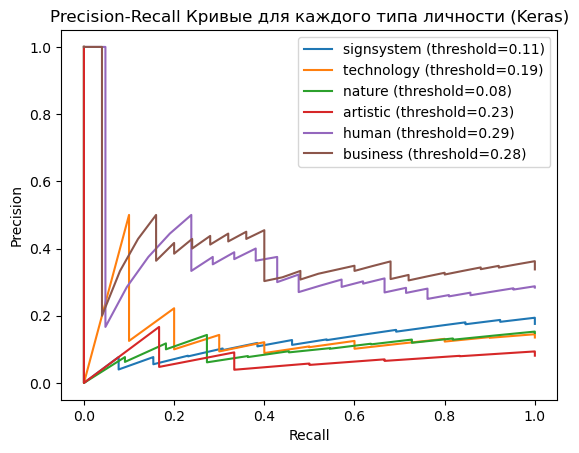

In [69]:
for i, col in enumerate(y.columns):
    precision, recall, thresholds = precision_recall_curve(y_test.iloc[:, i], y_pred_proba_df_keras.iloc[:, i])
    plt.plot(recall, precision, label=f'{col} (threshold={optimal_thresholds_keras[col]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Кривые для каждого типа личности (Keras)')
plt.legend()
plt.show()


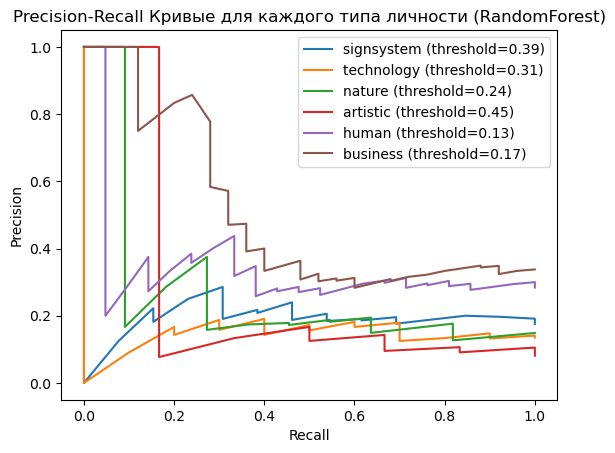

In [70]:
for i, col in enumerate(y.columns):
    precision, recall, thresholds = precision_recall_curve(y_test.iloc[:, i], y_pred_proba_df_rf.iloc[:, i])
    plt.plot(recall, precision, label=f'{col} (threshold={optimal_thresholds_rf[col]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Кривые для каждого типа личности (RandomForest)')
plt.legend()
plt.show()


In [ ]:
y_pred_keras = (y_pred_proba_df_keras > list(optimal_thresholds_keras.values())).astype(int)

precision_keras = precision_score(y_test, y_pred_keras, average='macro')
recall_keras = recall_score(y_test, y_pred_keras, average='macro')
f1_keras = f1_score(y_test, y_pred_keras, average='macro')
accuracy_keras = accuracy_score(y_test, y_pred_keras)

print(f"Precision (Keras): {precision_keras}")
print(f"Recall (Keras): {recall_keras}")
print(f"F1-Score (Keras): {f1_keras}")
print(f"Accuracy (Keras): {accuracy_keras}")


In [ ]:
# Применение порогов для получения предсказанных меток (RandomForest)
y_pred_rf = (y_pred_proba_df_rf > list(optimal_thresholds_rf.values())).astype(int)

# Расчет метрик (RandomForest)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Precision (RandomForest): {precision_rf}")
print(f"Recall (RandomForest): {recall_rf}")
print(f"F1-Score (RandomForest): {f1_rf}")
print(f"Accuracy (RandomForest): {accuracy_rf}")


In [13]:
import joblib

# Загрузка модели
model = joblib.load('random_forest_model.pkl')

# Печать версии scikit-learn, использованной для обучения модели
print(model.__module__, model.__class__.__name__)
print("Версия scikit-learn:", model.__module__.split('.')[-1])


sklearn.multioutput MultiOutputClassifier
Версия scikit-learn: multioutput
